<a href="https://colab.research.google.com/github/SatthuSaiPranavi/AI_Projects/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.19.0


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Part 2 - Now let's make the ANN!

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [24]:
# Initialising the ANN
classifier = Sequential()

In [25]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [26]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [27]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [28]:
classifier.add(Dense(1,activation='sigmoid'))

In [29]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7973 - loss: 0.5475 - val_accuracy: 0.8035 - val_loss: 0.4547
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7998 - loss: 0.4500 - val_accuracy: 0.8118 - val_loss: 0.4379
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8108 - loss: 0.4255 - val_accuracy: 0.8141 - val_loss: 0.4305
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8172 - loss: 0.4202 - val_accuracy: 0.8160 - val_loss: 0.4230
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8317 - loss: 0.3913 - val_accuracy: 0.8205 - val_loss: 0.4147
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8264 - loss: 0.3923 - val_accuracy: 0.8262 - val_loss: 0.4069
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8354 - loss: 0.3908 - val_accuracy: 0.8342 - val_loss: 0.3915
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8557 - loss: 0.3549 - val_accuracy: 0.

In [31]:
# list all data in history

print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


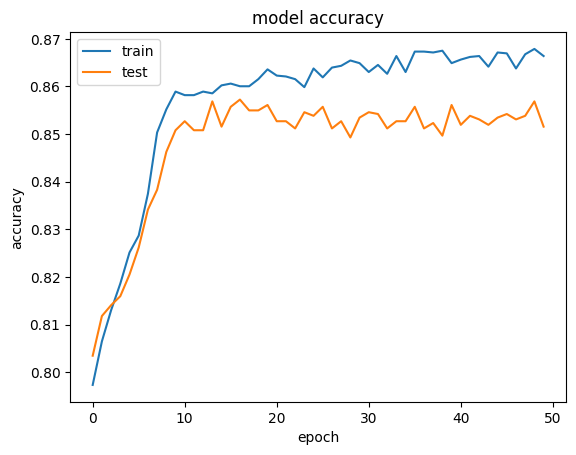

In [32]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

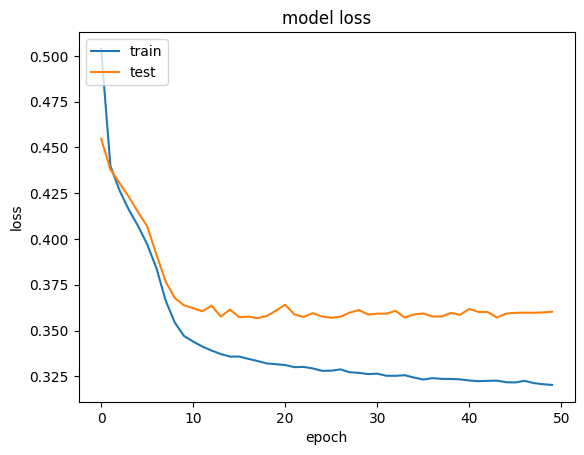

In [33]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1475,  120],
       [ 184,  221]])

In [36]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [37]:
score

0.848

In [38]:
#get the weights
classifier.get_weights()

[array([[ 0.0715979 , -0.01710223,  0.01842412,  0.27240762, -0.09034421,
          0.11837406,  0.469342  , -0.09747764, -0.2404753 , -0.11468311,
         -0.26824406],
        [-0.4927721 , -0.39753968,  0.06092299, -0.6598453 ,  0.23922509,
          0.24626575, -0.02131835,  0.13607152, -0.33129227,  0.92367744,
         -0.5071402 ],
        [-0.07807075, -0.1086721 , -0.06664126,  0.01634404,  0.33361828,
         -0.18979879,  0.34023386,  0.1784652 ,  0.12365954,  0.00402156,
          0.13667499],
        [-0.16144903, -0.17359209,  0.15976515,  0.7816782 ,  0.3803998 ,
         -0.5467684 , -0.43207636, -0.5099672 , -0.23982218, -0.35850516,
          0.06912994],
        [-0.40141633, -0.13269934,  1.2518022 , -0.28108287, -0.43061733,
          0.28245416,  0.37768912, -0.88106054,  0.18217738, -0.8551336 ,
          0.09048956],
        [ 0.14716616,  0.27373502,  0.05969931,  0.17115189,  0.34179518,
         -0.03970214, -0.05109976,  0.02874909, -0.4785088 , -0.1115419